# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [134]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [135]:
cities

['longyearbyen',
 'faanui',
 'amderma',
 'ushuaia',
 'alice springs',
 'nantucket',
 'tuktoyaktuk',
 'namibe',
 'rikitea',
 'constitucion',
 'sorland',
 'fuxin',
 'atuona',
 'cape town',
 'puerto ayora',
 'bredasdorp',
 'busselton',
 'vaini',
 'walvis bay',
 'san andres',
 'grand centre',
 'mitu',
 'cidreira',
 'saint-augustin',
 'bluff',
 'akdepe',
 'bowen',
 'nizhneyansk',
 'slave lake',
 'saldanha',
 'sokoto',
 'road town',
 'pisco',
 'hunza',
 'new norfolk',
 'batemans bay',
 'cockburn harbour',
 'jamestown',
 'east london',
 'saint george',
 'tambacounda',
 'placerville',
 'baijiantan',
 'tasiilaq',
 'hobart',
 'melito di porto salvo',
 'we',
 'cabaiguan',
 'clyde river',
 'severodvinsk',
 'butaritari',
 'hermanus',
 'tshikapa',
 'mys shmidta',
 'ingham',
 'ust-kamchatsk',
 'malinovoye ozero',
 'bahir dar',
 'yellowknife',
 'jalu',
 'kodiak',
 'north bend',
 'uglegorsk',
 'mossendjo',
 'shestakovo',
 'ekhabi',
 'ancud',
 'turayf',
 'hithadhoo',
 'upernavik',
 'mendi',
 'riyadh',
 

In [136]:

string_cit = str(cities)
rep_cities = string_cit.replace("\'", "\"")

list_cities = list(cities)

list_cities

['longyearbyen',
 'faanui',
 'amderma',
 'ushuaia',
 'alice springs',
 'nantucket',
 'tuktoyaktuk',
 'namibe',
 'rikitea',
 'constitucion',
 'sorland',
 'fuxin',
 'atuona',
 'cape town',
 'puerto ayora',
 'bredasdorp',
 'busselton',
 'vaini',
 'walvis bay',
 'san andres',
 'grand centre',
 'mitu',
 'cidreira',
 'saint-augustin',
 'bluff',
 'akdepe',
 'bowen',
 'nizhneyansk',
 'slave lake',
 'saldanha',
 'sokoto',
 'road town',
 'pisco',
 'hunza',
 'new norfolk',
 'batemans bay',
 'cockburn harbour',
 'jamestown',
 'east london',
 'saint george',
 'tambacounda',
 'placerville',
 'baijiantan',
 'tasiilaq',
 'hobart',
 'melito di porto salvo',
 'we',
 'cabaiguan',
 'clyde river',
 'severodvinsk',
 'butaritari',
 'hermanus',
 'tshikapa',
 'mys shmidta',
 'ingham',
 'ust-kamchatsk',
 'malinovoye ozero',
 'bahir dar',
 'yellowknife',
 'jalu',
 'kodiak',
 'north bend',
 'uglegorsk',
 'mossendjo',
 'shestakovo',
 'ekhabi',
 'ancud',
 'turayf',
 'hithadhoo',
 'upernavik',
 'mendi',
 'riyadh',
 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [137]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

testcities2 = ['bilibino',
          'illoqqortoormiut',
          'tocopilla',
          'taolanaro',
          'rikitea',
          'new norfolk',
          'codrington']
testcities3 = ['paris',
           'illoqqortoormiut',
           'dallas',
           'new orleans',
           'seattle',
           'houston',
           'new norfolk',
           'codrington']


# set up lists to hold reponse info
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []


# Loop through the list of cities and perform a request for data on each
for city in list_cities:
    
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing Record | {response}")
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        wind.append(response['wind']['speed'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

Processing Record 1 of Set 1 | {'coord': {'lon': 15.63, 'lat': 78.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 19.4, 'pressure': 983, 'humidity': 73, 'temp_min': 19.4, 'temp_max': 19.4}, 'visibility': 10000, 'wind': {'speed': 40.26, 'deg': 110, 'gust': 22.6}, 'clouds': {'all': 20}, 'dt': 1547095800, 'sys': {'type': 1, 'id': 1663, 'message': 0.0047, 'country': 'NO', 'sunrise': 0, 'sunset': 0}, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 81.02, 'pressure': 1025.5, 'humidity': 100, 'temp_min': 81.02, 'temp_max': 81.02, 'sea_level': 1025.64, 'grnd_level': 1025.5}, 'wind': {'speed': 14, 'deg': 30.5042}, 'rain': {'3h': 0.455}, 'clouds': {'all': 92}, 'dt': 1547099960, 'sys': {'message': 0.0037, '

Processing Record 1 of Set 1 | {'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 69.86, 'pressure': 1023.72, 'humidity': 94, 'temp_min': 69.86, 'temp_max': 69.86, 'sea_level': 1024.75, 'grnd_level': 1023.72}, 'wind': {'speed': 20.71, 'deg': 242.004}, 'clouds': {'all': 0}, 'dt': 1547099963, 'sys': {'message': 0.0037, 'country': 'AU', 'sunrise': 1547068737, 'sunset': 1547119963}, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 76.96, 'pressure': 1019, 'humidity': 29, 'temp_min': 75.2, 'temp_max': 78.8}, 'visibility': 8000, 'wind': {'speed': 9.17, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1547096400, 'sys': {'type': 1, 'id': 9229, 'message': 0.0032, 'country': 'IN', 'sunris

Processing Record 1 of Set 1 | {'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1015, 'humidity': 26, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 310}, 'clouds': {'all': 0}, 'dt': 1547096400, 'sys': {'type': 1, 'id': 9545, 'message': 0.0026, 'country': 'AU', 'sunrise': 1547059544, 'sunset': 1547113922}, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 150.18, 'lat': -35.71}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68.2, 'pressure': 1008.55, 'humidity': 89, 'temp_min': 68.2, 'temp_max': 68.2, 'sea_level': 1031.84, 'grnd_level': 1008.55}, 'wind': {'speed': 4.5, 'deg': 83.0042}, 'clouds': {'all': 92}, 'dt': 1547099967, 'sys': {'message': 0.0047, 'country': 'AU',

Processing Record 1 of Set 1 | {'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.19, 'pressure': 984.4, 'humidity': 90, 'temp_min': 60.19, 'temp_max': 60.19, 'sea_level': 1023.9, 'grnd_level': 984.4}, 'wind': {'speed': 4.5, 'deg': 325.504}, 'clouds': {'all': 76}, 'dt': 1547099970, 'sys': {'message': 0.003, 'country': 'ZA', 'sunrise': 1547091700, 'sunset': 1547143144}, 'id': 3366880, 'name': 'Hermanus', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 20.79, 'lat': -6.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.9, 'pressure': 957, 'humidity': 99, 'temp_min': 70.9, 'temp_max': 70.9, 'sea_level': 1025.6, 'grnd_level': 957}, 'wind': {'speed': 2.48, 'deg': 5.00415}, 'clouds': {'all': 68}, 'dt': 1547099971, 'sys': {'message': 0.0027, 'country': 'CD', 'sunri

Processing Record 1 of Set 1 | {'coord': {'lon': 73.08, 'lat': -0.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.44, 'pressure': 1025.01, 'humidity': 100, 'temp_min': 80.44, 'temp_max': 80.44, 'sea_level': 1025.07, 'grnd_level': 1025.01}, 'wind': {'speed': 10.65, 'deg': 76.5042}, 'clouds': {'all': 80}, 'dt': 1547099974, 'sys': {'message': 0.0031, 'country': 'MV', 'sunrise': 1547082626, 'sunset': 1547126386}, 'id': 1282256, 'name': 'Hithadhoo', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -56.15, 'lat': 72.79}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -0.07, 'pressure': 1037.66, 'humidity': 99, 'temp_min': -0.07, 'temp_max': -0.07, 'sea_level': 1041.12, 'grnd_level': 1037.66}, 'wind': {'speed': 20.83, 'deg': 200.004}, 'clouds': {'all': 64}, 'dt': 1547099974, 'sys': {'message': 0.0033, '

Processing Record 1 of Set 1 | {'coord': {'lon': -49.67, 'lat': 61.99}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27.29, 'pressure': 1022.1, 'humidity': 100, 'temp_min': 27.29, 'temp_max': 27.29, 'sea_level': 1025.03, 'grnd_level': 1022.1}, 'wind': {'speed': 21.83, 'deg': 348.504}, 'clouds': {'all': 24}, 'dt': 1547099978, 'sys': {'message': 0.0029, 'country': 'GL', 'sunrise': 1547123482, 'sunset': 1547144495}, 'id': 3421193, 'name': 'Paamiut', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 43.28, 'lat': -11.38}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1012, 'humidity': 78, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 20}, 'dt': 1547096400, 'sys': {'type': 1, 'id': 2129, 'message': 0.0068, 'country': 'KM', 'sunrise': 15470

Processing Record 1 of Set 1 | {'coord': {'lon': 150.85, 'lat': -34.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1017, 'humidity': 82, 'temp_min': 68, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 150}, 'clouds': {'all': 90}, 'dt': 1547098200, 'sys': {'type': 1, 'id': 9594, 'message': 0.004, 'country': 'AU', 'sunrise': 1547060070, 'sunset': 1547111585}, 'id': 6255012, 'name': 'Flinders', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 41, 'pressure': 1015, 'humidity': 41, 'temp_min': 41, 'temp_max': 41}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1547098200, 'sys': {'type': 1, 'id': 7955, 'message': 0.0029, 'country': 'JP', 'sunrise': 1547070

Processing Record 1 of Set 1 | {'coord': {'lon': 14.28, 'lat': -22.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 59.65, 'pressure': 1013.91, 'humidity': 100, 'temp_min': 59.65, 'temp_max': 59.65, 'sea_level': 1027.34, 'grnd_level': 1013.91}, 'wind': {'speed': 2.59, 'deg': 312.504}, 'rain': {'3h': 0.15}, 'clouds': {'all': 92}, 'dt': 1547099985, 'sys': {'message': 0.003, 'country': 'NA', 'sunrise': 1547094515, 'sunset': 1547142720}, 'id': 3356832, 'name': 'Henties Bay', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 22.13, 'lat': -30.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 61.45, 'pressure': 870.02, 'humidity': 58, 'temp_min': 61.45, 'temp_max': 61.45, 'sea_level': 1020.86, 'grnd_level': 870.02}, 'wind': {'speed': 5.17, 'deg': 245.504}, 'clouds': {'all': 0}, 'dt': 1547099986, 'sys': {'message':

Processing Record 1 of Set 1 | {'coord': {'lon': -15.83, 'lat': 11.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.96, 'pressure': 1023.39, 'humidity': 100, 'temp_min': 77.96, 'temp_max': 77.96, 'sea_level': 1023.78, 'grnd_level': 1023.39}, 'wind': {'speed': 4.61, 'deg': 355.004}, 'clouds': {'all': 80}, 'dt': 1547099991, 'sys': {'message': 0.0032, 'country': 'GW', 'sunrise': 1547105131, 'sunset': 1547146574}, 'id': 2374583, 'name': 'Bubaque', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 152.85, 'lat': -25.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86, 'pressure': 1012, 'humidity': 45, 'temp_min': 86, 'temp_max': 86}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1547096400, 'sys': {'type': 1, 'id': 9501, 'message': 0.0035, 'country': 'AU', 

Processing Record 1 of Set 1 | {'coord': {'lon': 173.16, 'lat': -35.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 71.57, 'pressure': 1019.42, 'humidity': 83, 'temp_min': 71.57, 'temp_max': 71.57, 'sea_level': 1032.65, 'grnd_level': 1019.42}, 'wind': {'speed': 4.94, 'deg': 230.004}, 'rain': {'3h': 0.15}, 'clouds': {'all': 88}, 'dt': 1547099995, 'sys': {'message': 0.003, 'country': 'NZ', 'sunrise': 1547054621, 'sunset': 1547106322}, 'id': 2194098, 'name': 'Ahipara', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 50.17, 'lat': -14.27}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 78.64, 'pressure': 1023.64, 'humidity': 100, 'temp_min': 78.64, 'temp_max': 78.64, 'sea_level': 1026.25, 'grnd_level': 1023.64}, 'wind': {'speed': 3.15, 'deg': 153.504}, 'rain': {'3h': 1.52}, 'clouds': {'all': 68}, 'dt': 15470999

Processing Record 1 of Set 1 | {'coord': {'lon': -8.45, 'lat': 37.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 44.6, 'pressure': 1016, 'humidity': 81, 'temp_min': 44.6, 'temp_max': 44.6}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1547096400, 'sys': {'type': 1, 'id': 6892, 'message': 0.0059, 'country': 'PT', 'sunrise': 1547106455, 'sunset': 1547141716}, 'id': 2267254, 'name': 'Lagoa', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 48.47, 'lat': 56.76}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.1, 'pressure': 1015.12, 'humidity': 81, 'temp_min': 10.1, 'temp_max': 10.1, 'sea_level': 1037.11, 'grnd_level': 1015.12}, 'wind': {'speed': 10.2, 'deg': 242.504}, 'clouds': {'all': 56}, 'dt': 1547099999, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1

Processing Record 1 of Set 1 | {'coord': {'lon': 45.34, 'lat': 2.04}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1012, 'humidity': 69, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1547096400, 'sys': {'type': 1, 'id': 2497, 'message': 0.1661, 'country': 'SO', 'sunrise': 1547089542, 'sunset': 1547132790}, 'id': 53654, 'name': 'Mogadishu', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 1.41, 'lat': 18.44}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 40.39, 'pressure': 973.62, 'humidity': 75, 'temp_min': 40.39, 'temp_max': 40.39, 'sea_level': 1029.94, 'grnd_level': 973.62}, 'wind': {'spe

Processing Record 1 of Set 1 | {'coord': {'lon': 22.98, 'lat': 42.29}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 23, 'pressure': 1003, 'humidity': 100, 'temp_min': 23, 'temp_max': 23}, 'visibility': 3700, 'wind': {'speed': 2.15, 'deg': 19.5042}, 'clouds': {'all': 75}, 'dt': 1547098200, 'sys': {'type': 1, 'id': 6366, 'message': 0.179, 'country': 'BG', 'sunrise': 1547099780, 'sunset': 1547133303}, 'id': 726872, 'name': 'Shatrovo', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 23.6, 'lat': -3.52}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 72.47, 'pressure': 963.24, 'humidity': 92, 'temp_min': 72.47, 'temp_max': 72.47, 'sea_level': 1025.76, 'grnd_level': 963.24}, 'wind': {'speed': 3.04, 'deg': 218.004}, 'clouds': {'all': 56}, 'dt': 1547100021, 'sys': {'message': 0.4134, 'country': 'CD', 'sunrise': 154709

Processing Record 1 of Set 1 | {'coord': {'lon': 73, 'lat': 5.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.24, 'pressure': 1025.82, 'humidity': 100, 'temp_min': 82.24, 'temp_max': 82.24, 'sea_level': 1025.8, 'grnd_level': 1025.82}, 'wind': {'speed': 14.45, 'deg': 62.5042}, 'clouds': {'all': 0}, 'dt': 1547100028, 'sys': {'message': 0.1317, 'country': 'MV', 'sunrise': 1547083254, 'sunset': 1547125799}, 'id': 1337619, 'name': 'Ugoofaaru', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -54.34, 'lat': -34.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 68.74, 'pressure': 1004.1, 'humidity': 97, 'temp_min': 68.74, 'temp_max': 68.74, 'sea_level': 1020.78, 'grnd_level': 1004.1}, 'wind': {'speed': 5.5, 'deg': 168.504}, 'rain': {'3h': 0.255}, 'clouds': {'all': 88}, 'dt': 1547099843, 'sys': {'message': 0.00

Processing Record 1 of Set 1 | {'coord': {'lon': -80.34, 'lat': 33.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 39.2, 'pressure': 1016, 'humidity': 55, 'temp_min': 35.6, 'temp_max': 42.98}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 240}, 'clouds': {'all': 1}, 'dt': 1547098500, 'sys': {'type': 1, 'id': 5875, 'message': 0.0045, 'country': 'US', 'sunrise': 1547123230, 'sunset': 1547159457}, 'id': 4597948, 'name': 'Sumter', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -80.02, 'lat': 0.61}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 74.63, 'pressure': 1000.69, 'humidity': 91, 'temp_min': 74.63, 'temp_max': 74.63, 'sea_level': 1026.01, 'grnd_level': 1000.69}, 'wind': {'speed': 5.5, 'deg': 8.50415}, 'rain': {'3h': 0.16}, 'clouds': {'all': 92}, 'dt': 1547100034, 'sys': {'message': 0.0177, 'countr

Processing Record 1 of Set 1 | {'coord': {'lon': 147.27, 'lat': -2.02}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 85.97, 'pressure': 1017.31, 'humidity': 92, 'temp_min': 85.97, 'temp_max': 85.97, 'sea_level': 1019.48, 'grnd_level': 1017.31}, 'wind': {'speed': 10.42, 'deg': 295.504}, 'rain': {'3h': 0.1}, 'clouds': {'all': 36}, 'dt': 1547100038, 'sys': {'message': 0.0034, 'country': 'PG', 'sunrise': 1547064677, 'sunset': 1547108713}, 'id': 2092164, 'name': 'Lorengau', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 108.01, 'lat': 61.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.43, 'pressure': 974.27, 'humidity': 84, 'temp_min': 13.43, 'temp_max': 13.43, 'sea_level': 1016.77, 'grnd_level': 974.27}, 'wind': {'speed': 6.62, 'deg': 230.504}, 'clouds': {'all': 76}, 'dt': 1547100038, 'sys': {'messag

Processing Record 1 of Set 1 | {'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.98, 'pressure': 1019, 'humidity': 90, 'temp_min': 69.98, 'temp_max': 69.98}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 280}, 'clouds': {'all': 90}, 'dt': 1547098260, 'sys': {'type': 1, 'id': 7881, 'message': 0.0029, 'country': 'US', 'sunrise': 1547139429, 'sunset': 1547179138}, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 143.23, 'lat': 51.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 9.29, 'pressure': 1011.23, 'humidity': 100, 'temp_min': 9.29, 'temp_max': 9.29, 'sea_level': 1013.65, 'grnd_level': 1011.23}, 'wind': {'speed': 6.51, 'deg': 38.5042}, 'clouds': {'all': 0}, 'dt': 1547100043, 'sys': {'message': 0.0445, 'country': 'RU', 'sun

Processing Record 1 of Set 1 | {'coord': {'lon': 106.68, 'lat': 35.54}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 28.42, 'pressure': 860.46, 'humidity': 63, 'temp_min': 28.42, 'temp_max': 28.42, 'sea_level': 1040.88, 'grnd_level': 860.46}, 'wind': {'speed': 3.71, 'deg': 313.004}, 'clouds': {'all': 24}, 'dt': 1547100047, 'sys': {'message': 0.1086, 'country': 'CN', 'sunrise': 1547078583, 'sunset': 1547114309}, 'id': 1798760, 'name': 'Pingliang', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -82.35, 'lat': 31.21}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 44.56, 'pressure': 1019, 'humidity': 41, 'temp_min': 42.08, 'temp_max': 46.94}, 'visibility': 16093, 'wind': {'speed': 4.7, 'de

Processing Record 1 of Set 1 | {'coord': {'lon': 24.73, 'lat': -34}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 65.09, 'pressure': 1011.47, 'humidity': 96, 'temp_min': 65.09, 'temp_max': 65.09, 'sea_level': 1020.86, 'grnd_level': 1011.47}, 'wind': {'speed': 10.98, 'deg': 255.004}, 'rain': {'3h': 0.975}, 'clouds': {'all': 88}, 'dt': 1547100052, 'sys': {'message': 0.0521, 'country': 'ZA', 'sunrise': 1547090446, 'sunset': 1547141764}, 'id': 986717, 'name': 'Kruisfontein', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -47.17, 'lat': -22.57}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1015, 'humidity': 83, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 9000, 'wind': {'speed': 3.36, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1547096400, 'sys': {'type': 1, 'id': 8393, 'message'

Processing Record 1 of Set 1 | {'coord': {'lon': -3.91, 'lat': 57.76}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 47.66, 'pressure': 1028, 'humidity': 87, 'temp_min': 46.4, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 240}, 'clouds': {'all': 20}, 'dt': 1547097600, 'sys': {'type': 1, 'id': 1435, 'message': 0.0513, 'country': 'GB', 'sunrise': 1547110393, 'sunset': 1547135610}, 'id': 2656575, 'name': 'Balintore', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 169.27, 'lat': -19.55}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.41, 'pressure': 1018.85, 'humidity': 100, 'temp_min': 78.41, 'temp_max': 78.41, 'sea_level': 1020.82, 'grnd_level': 1018.85}, 'wind': {'speed': 12.1, 'deg': 135.504}, 'clouds': {'all': 64}, 'dt': 1547100058, 'sys': {'message': 0.0768, 'country': 'V

Processing Record 1 of Set 1 | {'coord': {'lon': -76.82, 'lat': 42.05}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 25.61, 'pressure': 1004, 'humidity': 85, 'temp_min': 24.8, 'temp_max': 26.96}, 'visibility': 4828, 'wind': {'speed': 23.04, 'deg': 300, 'gust': 14.9}, 'clouds': {'all': 90}, 'dt': 1547099340, 'sys': {'type': 1, 'id': 4542, 'message': 0.3627, 'country': 'US', 'sunrise': 1547123684, 'sunset': 1547157317}, 'id': 5139058, 'name': 'Southport', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 22.27, 'lat': -5.47}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 68.74, 'pressure': 962.67, 'humidity': 98, 'temp_min': 68.74, 'temp_max': 68.74, 'sea_level': 1026.21, 'grnd_level': 962.67}, 'wind': {'speed': 2.59, 'deg': 29.0042}, 'rain': 

Processing Record 1 of Set 1 | {'coord': {'lon': -24.5, 'lat': 14.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 72.2, 'pressure': 1015.53, 'humidity': 98, 'temp_min': 72.2, 'temp_max': 72.2, 'sea_level': 1027.26, 'grnd_level': 1015.53}, 'wind': {'speed': 14.67, 'deg': 29.0042}, 'clouds': {'all': 8}, 'dt': 1547100069, 'sys': {'message': 0.004, 'country': 'CV', 'sunrise': 1547107579, 'sunset': 1547148290}, 'id': 3374210, 'name': 'Sao Filipe', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 53.15, 'lat': 67.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.91, 'pressure': 1027.45, 'humidity': 80, 'temp_min': 1.91, 'temp_max': 1.91, 'sea_level': 1030.42, 'grnd_level': 1027.45}, 'wind': {'speed': 14.45, 'deg': 241.004}, 'clouds': {'all': 56}, 'dt': 1547100069, 'sys': {'message': 0.0073, 'country': 'RU'

Processing Record 1 of Set 1 | {'coord': {'lon': 141.67, 'lat': 43.93}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 29.14, 'pressure': 1004, 'humidity': 86, 'temp_min': 28.4, 'temp_max': 30.2}, 'visibility': 4000, 'wind': {'speed': 6.93, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1547098320, 'sys': {'type': 1, 'id': 7967, 'message': 0.0131, 'country': 'JP', 'sunrise': 1547071610, 'sunset': 1547104486}, 'id': 2128382, 'name': 'Rumoi', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 153.1, 'lat': -30.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 85.95, 'pressure': 1014, 'humidity': 69, 'temp_min': 82.4, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 40}, 'clouds': {'all': 0}, 'dt': 1547098200, 'sys': {'type': 1, 'id': 9521, 'message': 0.2007, 'country': 'AU', 'sunrise': 154

Processing Record 1 of Set 1 | {'coord': {'lon': -63.06, 'lat': 18.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 73.4, 'pressure': 1016, 'humidity': 78, 'temp_min': 73.4, 'temp_max': 73.4}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 90}, 'clouds': {'all': 20}, 'dt': 1547096400, 'sys': {'type': 1, 'id': 8801, 'message': 0.0528, 'country': 'AI', 'sunrise': 1547117182, 'sunset': 1547157202}, 'id': 3573374, 'name': 'The Valley', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 94.89, 'lat': 55.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.3, 'pressure': 983.59, 'humidity': 85, 'temp_min': 22.3, 'temp_max': 22.3, 'sea_level': 1027.99, 'grnd_level': 983.59}, 'wind': {'speed': 14.12, 'deg': 256.504}, 'clouds': {'all': 76}, 'dt': 1547100078, 'sys': {'message': 0.1494, 'country': 'RU', 'sunr

Processing Record 1 of Set 1 | {'coord': {'lon': -151.33, 'lat': -22.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.42, 'pressure': 1027.2, 'humidity': 100, 'temp_min': 77.42, 'temp_max': 77.42, 'sea_level': 1027.26, 'grnd_level': 1027.2}, 'wind': {'speed': 17.81, 'deg': 101.004}, 'clouds': {'all': 100}, 'dt': 1547100083, 'sys': {'message': 0.0701, 'country': 'PF', 'sunrise': 1547134244, 'sunset': 1547182505}, 'id': 4034188, 'name': 'Moerai', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
------------
Processing Record 1 of Set 1 | {'cod': '404', 'message': 'city not found'}
Missing field/result... skipping.
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 139.92, 'lat': 53.94}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'tem

Processing Record 1 of Set 1 | {'coord': {'lon': -65.37, 'lat': -1.83}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 74, 'pressure': 1016.83, 'humidity': 96, 'temp_min': 74, 'temp_max': 74, 'sea_level': 1022.85, 'grnd_level': 1016.83}, 'wind': {'speed': 2.71, 'deg': 125.504}, 'clouds': {'all': 48}, 'dt': 1547100087, 'sys': {'message': 0.003, 'country': 'BR', 'sunrise': 1547115745, 'sunset': 1547159741}, 'id': 3663475, 'name': 'Maraa', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -158.01, 'lat': 21.32}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 72.7, 'pressure': 1019, 'humidity': 86, 'temp_min': 69.62, 'temp_max': 75.02}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1547096760, 'sys': {'type': 1, 'id': 7868, 'message': 0.0034, 'country': 'US', 'sunrise': 

Processing Record 1 of Set 1 | {'coord': {'lon': 163.07, 'lat': 59.24}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.09, 'pressure': 993.72, 'humidity': 91, 'temp_min': 16.09, 'temp_max': 16.09, 'sea_level': 1006.83, 'grnd_level': 993.72}, 'wind': {'speed': 7.07, 'deg': 354.504}, 'clouds': {'all': 88}, 'dt': 1547100091, 'sys': {'message': 0.0027, 'country': 'RU', 'sunrise': 1547070999, 'sunset': 1547094831}, 'id': 2122389, 'name': 'Ossora', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -1.13, 'lat': 38.18}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 45.5, 'pressure': 1016, 'humidity': 48, 'temp_min': 44.6, 'temp_max': 46.4}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 1547098200, 'sys': {'type': 1, 'id': 6391, 'message': 0.0318, 'country': 'ES', 'su

Processing Record 1 of Set 1 | {'coord': {'lon': 32.62, 'lat': -20.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 83.05, 'pressure': 950.51, 'humidity': 70, 'temp_min': 83.05, 'temp_max': 83.05, 'sea_level': 1020.94, 'grnd_level': 950.51}, 'wind': {'speed': 3.94, 'deg': 15.0042}, 'clouds': {'all': 8}, 'dt': 1547100097, 'sys': {'message': 0.0093, 'country': 'ZW', 'sunrise': 1547090333, 'sunset': 1547138098}, 'id': 893549, 'name': 'Chipinge', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -38.39, 'lat': -3.9}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1010, 'humidity': 83, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1547096400, 'sys': {'type': 1, 'id': 8363, 'message': 0.0137, 'country': 'BR', 'sunris

Processing Record 1 of Set 1 | {'coord': {'lon': 88.17, 'lat': 57.31}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 8.66, 'pressure': 1005.64, 'humidity': 64, 'temp_min': 8.66, 'temp_max': 8.66, 'sea_level': 1028.11, 'grnd_level': 1005.64}, 'wind': {'speed': 7.18, 'deg': 258.004}, 'clouds': {'all': 68}, 'dt': 1547100101, 'sys': {'message': 0.0082, 'country': 'RU', 'sunrise': 1547088125, 'sunset': 1547113666}, 'id': 1489822, 'name': 'Teguldet', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -77.74, 'lat': 39.62}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.62, 'pressure': 1013, 'humidity': 52, 'temp_min': 28.04, 'temp_max': 32}, 'visibility': 16093, 'wind': {'speed': 14.99, 'deg': 300, 'gust': 10.8}, 'clouds': {'all': 90}, 'dt': 1547099580, 'sys': {'type': 1, 'id': 4970, 'message': 0.0051, '

Processing Record 1 of Set 1 | {'coord': {'lon': -6.58, 'lat': 6.49}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.65, 'pressure': 996.8, 'humidity': 93, 'temp_min': 68.65, 'temp_max': 68.65, 'sea_level': 1024.63, 'grnd_level': 996.8}, 'wind': {'speed': 3.15, 'deg': 206.004}, 'clouds': {'all': 0}, 'dt': 1547100105, 'sys': {'message': 0.0025, 'country': 'CI', 'sunrise': 1547102438, 'sunset': 1547144825}, 'id': 2287790, 'name': 'Issia', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 24.86, 'lat': 57.15}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 14, 'pressure': 1017, 'humidity': 92, 'temp_min': 14, 'temp_max': 14}, 'visibility': 7000, 'wind': {'speed': 4.7, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1547097600, 'sys': {'type': 1, 'id': 1876, 'message': 0.0043, 'country': 'LV', 'sunrise': 1547103246, 'su

Processing Record 1 of Set 1 | {'coord': {'lon': -1.75, 'lat': 4.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.21, 'pressure': 1021.2, 'humidity': 100, 'temp_min': 80.21, 'temp_max': 80.21, 'sea_level': 1024.22, 'grnd_level': 1021.2}, 'wind': {'speed': 8.63, 'deg': 198.004}, 'clouds': {'all': 0}, 'dt': 1547100119, 'sys': {'message': 0.0422, 'country': 'GH', 'sunrise': 1547101122, 'sunset': 1547143820}, 'id': 2294915, 'name': 'Takoradi', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 112.45, 'lat': -7.54}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 89.6, 'pressure': 1008, 'humidity': 62, 'temp_min': 89.6, 'temp_max': 89.6}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1547098200, 'sys': {'type': 1, 'id': 9363, 'message': 0.0032, 'country': 'ID', 'sun

Processing Record 1 of Set 1 | {'coord': {'lon': 66.1, 'lat': 36.84}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 46.82, 'pressure': 968.75, 'humidity': 99, 'temp_min': 46.82, 'temp_max': 46.82, 'sea_level': 1026.78, 'grnd_level': 968.75}, 'wind': {'speed': 6.06, 'deg': 208.504}, 'rain': {'3h': 3.235}, 'clouds': {'all': 92}, 'dt': 1547100124, 'sys': {'message': 0.0041, 'country': 'AF', 'sunrise': 1547088518, 'sunset': 1547123859}, 'id': 1137160, 'name': 'Khairabad', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 22.35, 'lat': 70.24}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 28.4, 'pressure': 992, 'humidity': 68, 'temp_min': 28.4, 'temp_max': 28.4}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 170, 'gust': 12.3}, 'clouds': {'all': 75}, 'dt': 1547097600, 'sys': {'type': 1, 'id': 1632, 'messag

Processing Record 1 of Set 1 | {'coord': {'lon': -77.4, 'lat': 39}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 30.96, 'pressure': 1014, 'humidity': 53, 'temp_min': 28.04, 'temp_max': 33.98}, 'visibility': 16093, 'wind': {'speed': 20.8, 'deg': 300, 'gust': 12.3}, 'clouds': {'all': 90}, 'dt': 1547098500, 'sys': {'type': 1, 'id': 4624, 'message': 0.0056, 'country': 'US', 'sunrise': 1547123297, 'sunset': 1547157980}, 'id': 4787534, 'name': 'Sterling', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': -40.84, 'lat': -2.9}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.03, 'pressure': 1016.5, 'humidity': 100, 'temp_min': 71.03, 'temp_max': 71.03, 'sea_level': 1025.07, 'grnd_level': 1016.5}, 'wind': {'speed': 2.71, 'deg': 152.504}, 'rain': {'3h': 0.93}, 'clouds': {'all': 88}, 'dt': 1547100076, 'sys': {'message':

Processing Record 1 of Set 1 | {'coord': {'lon': 130.41, 'lat': 67.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -33.87, 'pressure': 929.36, 'humidity': 56, 'temp_min': -33.87, 'temp_max': -33.87, 'sea_level': 1032.86, 'grnd_level': 929.36}, 'wind': {'speed': 2.93, 'deg': 337.504}, 'clouds': {'all': 64}, 'dt': 1547100134, 'sys': {'message': 0.0038, 'country': 'RU', 'sunrise': 1547086265, 'sunset': 1547095254}, 'id': 2027042, 'name': 'Batagay-Alyta', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'cod': '500', 'message': 'Internal error: 500001'}
Missing field/result... skipping.
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 91.82, 'lat': 56.17}, 'weather': [{'id': 620, 'main': 'Snow', 'description': 'light shower snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 21.2, 'pressure': 1011, 'humidity': 73, 'temp_min': 21.2, 'temp_max': 21.2}, 'visibility': 9000, 'wind':

Processing Record 1 of Set 1 | {'coord': {'lon': 26.69, 'lat': 13.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 52.99, 'pressure': 947.6, 'humidity': 40, 'temp_min': 52.99, 'temp_max': 52.99, 'sea_level': 1031.76, 'grnd_level': 947.6}, 'wind': {'speed': 11.77, 'deg': 26.0042}, 'clouds': {'all': 0}, 'dt': 1547100138, 'sys': {'message': 0.0066, 'country': 'SD', 'sunrise': 1547095158, 'sunset': 1547136132}, 'id': 364933, 'name': 'Umm Kaddadah', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 121.23, 'lat': 14.31}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 87.8, 'pressure': 1014, 'humidity': 55, 'temp_min': 87.8, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1547096400, 'sys': {'type': 1, 'id': 8160, 'message': 0.0032, 'country': 'PH', 's

Processing Record 1 of Set 1 | {'coord': {'lon': 179.32, 'lat': 63.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.9, 'pressure': 1019.66, 'humidity': 89, 'temp_min': 25.9, 'temp_max': 25.9, 'sea_level': 1027.83, 'grnd_level': 1019.66}, 'wind': {'speed': 24.52, 'deg': 107.504}, 'clouds': {'all': 88}, 'dt': 1547100143, 'sys': {'message': 0.003, 'country': 'RU', 'sunrise': 1547069277, 'sunset': 1547088753}, 'id': 2126710, 'name': 'Beringovskiy', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'cod': '500', 'message': 'Internal error: 500001'}
Missing field/result... skipping.
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 134.5, 'lat': 33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 46.58, 'pressure': 1020, 'humidity': 56, 'temp_min': 44.6, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {

Processing Record 1 of Set 1 | {'coord': {'lon': 133.39, 'lat': 67.55}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -43.77, 'pressure': 983.1, 'humidity': 0, 'temp_min': -43.77, 'temp_max': -43.77, 'sea_level': 1033.3, 'grnd_level': 983.1}, 'wind': {'speed': 1.7, 'deg': 287.004}, 'clouds': {'all': 64}, 'dt': 1547100147, 'sys': {'message': 0.0449, 'country': 'RU', 'sunrise': 1547085072, 'sunset': 1547095016}, 'id': 2013465, 'name': 'Verkhoyansk', 'cod': 200}
------------
Processing Record 1 of Set 1 | {'coord': {'lon': 122.22, 'lat': -8.63}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.85, 'pressure': 1012.36, 'humidity': 95, 'temp_min': 84.85, 'temp_max': 84.85, 'sea_level': 1021.59, 'grnd_level': 1012.36}, 'wind': {'speed': 7.4, 'deg': 291.004}, 'clouds': {'all': 32}, 'dt': 1547100148, 'sys': {'message': 0.0033, 'c

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [141]:
from itertools import zip_longest
list_for_frame = [list_cities, clouds, country, date, humidity, lat, lng, temp, wind]
export_data = zip_longest(*list_for_frame, fillvalue = '')
with open('cities.csv', 'w', encoding="ISO-8859-1", newline='') as cities:
      wr = csv.writer(cities)
      wr.writerow(("Cities", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"))
      wr.writerows(export_data)
cities.close()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [144]:
# Name of the CSV file
csvfile = 'Desktop/cities.csv'
# The correct encoding must be used to read the CSV in pandas
df = pd.read_csv(csvfile, encoding="ISO-8859-1")

In [145]:
df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,longyearbyen,20.0,NO,1.547096e+09,73.0,78.22,15.63,19.40,40.26
1,faanui,92.0,PF,1.547100e+09,100.0,-16.48,-151.75,81.02,14.00
2,amderma,75.0,AR,1.547096e+09,65.0,-54.81,-68.31,46.40,4.70
3,ushuaia,0.0,AU,1.547098e+09,6.0,-23.70,133.88,100.40,14.99
4,alice springs,1.0,US,1.547098e+09,100.0,41.28,-70.10,35.06,16.11


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

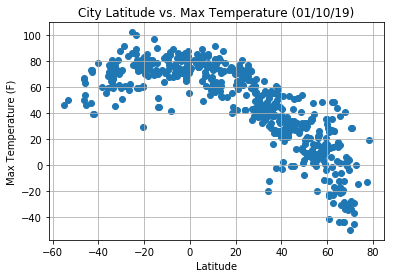

In [147]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (01/10/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

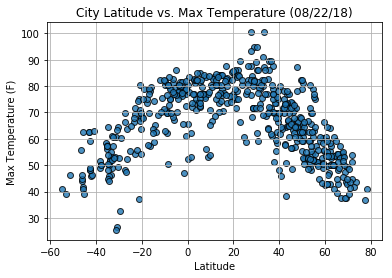

#### Latitude vs. Humidity Plot

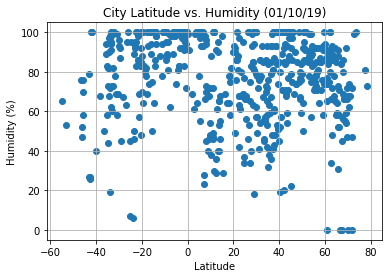

In [148]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (01/10/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

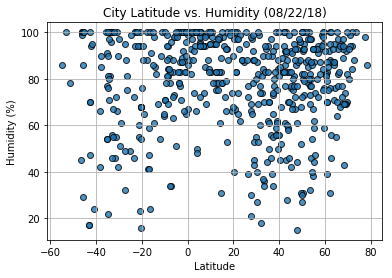

#### Latitude vs. Cloudiness Plot

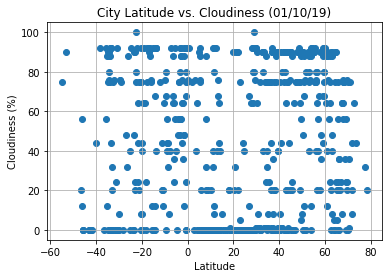

In [149]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (01/10/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

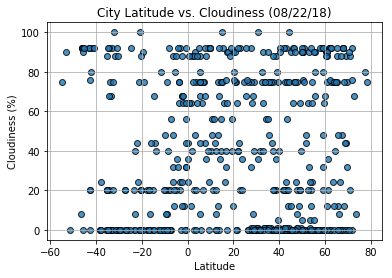

#### Latitude vs. Wind Speed Plot

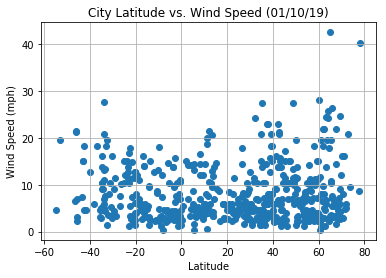

In [150]:
# Build a scatter plot for each data type
plt.scatter(df["Lat"], df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (01/10/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

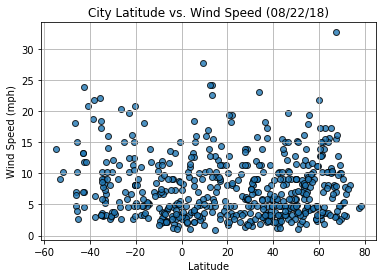